###### Machine Learning
    ### - Supervised Machine Learning  ( data + labels)
             - Regression    ( Regression, Lasso, Ridge)
                    - Simple Linear Regression
                    - Multiple Linear Regression
                    - Polynomial Regression
                    
             - Classification
                    - Binary Classification (0,1)(T/F)(CAT/DOG)
                    - Multiclassification   (Morethan 2 classes)
    ### - Unsupervised Machine Learning  ( data )
                    - Clustering 
                    - Dimensionality Reduction
                   
    ### - Semi_Supervised Machine Learning (data + labels(autoencoded) )
    ### - Reiforcement Learning

# Regression
    - Finding dependent variable values using independent variable/es
    

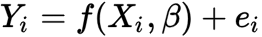

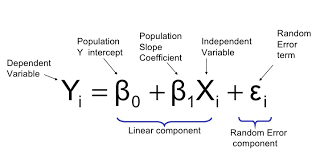

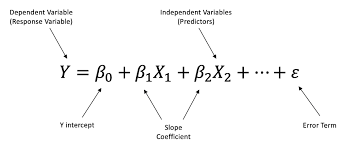

---**Hello everyone!**---

Today I am going to build my first machine learning alogrithm which a simple linear regression model.....


---**So what is linear regression?**---


--Linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression. 


--It is the easiest alogrithm among all machine learning agorithm.


--Its quite simple to implement.


----**About Dataset**----

Here I am using a simple dataset from kaggle which is Weights and Heights dataset tried to apply linear regression algorithm.

The data contains the variables

**---Gender**

** ---Height(m)**

**---Weight (kg)**



---**Goal**---

- Predict the height or weight of a person.


**Step 1--Data Preprocessing**

# Simple Linear Regression  ( Involves Only 1 input variable)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read the datasets
dataset=pd.read_csv("weight-height.csv")

In [3]:
#Check the dataset
dataset.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971111
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [4]:
#check if null values is present in dataset or not.....
dataset.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
#Checking the dimensions of the dataset
dataset.shape

(10000, 3)

In [6]:
# type and other info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


**Lets check the correlation between each variables**

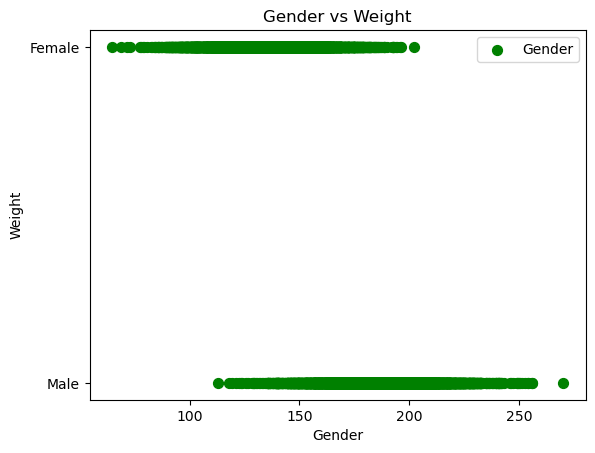

In [8]:
#Plot Gender vs Weight............
x1 = dataset.iloc[:, 0].values
y1 = dataset.iloc[:, 2].values
plt.scatter(y1,x1,label='Gender',color='Green',s=50)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Gender vs Weight')
plt.legend()
plt.show()


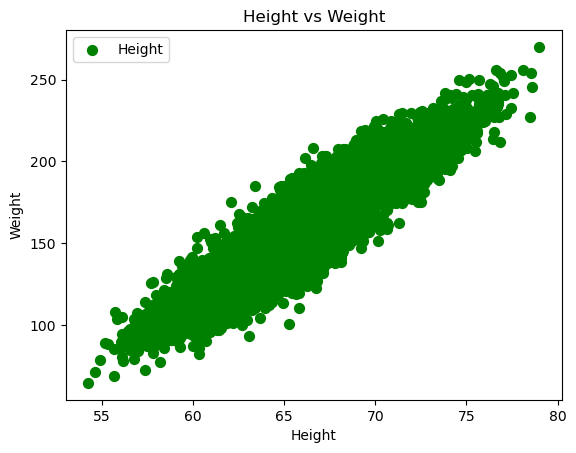

In [9]:
#Plot Height vs Weight............
x1 = dataset.iloc[:, 1].values
y1 = dataset.iloc[:, 2].values
plt.scatter(x1,y1,label='Height',color='Green',s=50)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend()
plt.show()


In [10]:
dataset.Gender = dataset.Gender.apply(lambda x: 0 if x=="Female" else 1)

In [11]:
dataset.Gender.corr(dataset.Weight)

0.7967233452062232

In [12]:
dataset.Height.corr(dataset.Weight)

0.9247562987378065

Here in the above plot, we can see **weight is not atall dependent on Gender**.
So,Gender variable **is not useful** for our prediction.

From the above plot can have idea that **weight and height are highly dependent** on each other.In other words,we can say that as **height increases ,weight also increases**.


In [13]:
# Step3.1: Separate predictors and target (input and output   X and y)
#X-Independent variable
X = dataset.drop(['Weight','Gender'],axis=1)
print(X)

         Height
0     73.847017
1     68.781904
2     74.110105
3     71.730978
4     69.881796
...         ...
9995  66.172652
9996  67.067155
9997  63.867992
9998  69.034243
9999  61.944246

[10000 rows x 1 columns]


In [14]:
#y-dependent or target variable
y = dataset['Weight']
print(y)


0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64


**Step 2-Splitting the dataset into training and testing set**

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=123)

In [16]:
#Creating linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

**Step 3-Build a linear model**

### Training the model 

In [17]:
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
lr.coef_, lr.intercept_

(array([7.72406641]), -351.29837817648445)

y = (7.73190342)* X - (351.790)

In [ ]:
print('Coefficients: ', lr.coef_)
print("Intercept", lr.intercept_)

# Prediction on Training Data : Training Accuracy 

In [19]:
#predicting the trainig set
y_train_pred = lr.predict(X_train)

In [20]:
pd.DataFrame({'Original Weight':y_train, 'Predicted_Weight': y_train_pred})

,Original Weight,Predicted_Weight
3144,201.877657,206.388514
9939,116.503429,111.385201
7925,119.681095,147.822922
309,185.148202,171.627005
9415,134.955817,138.102407
...,...,...
9785,136.135550,133.157335
7763,151.211972,160.944369
5218,119.315988,137.788099
1346,200.313016,181.642431


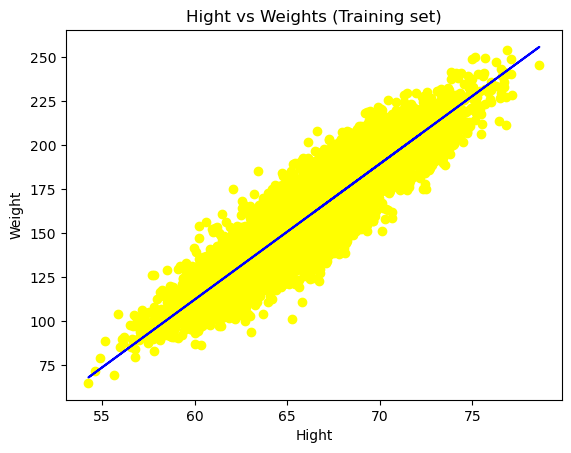

In [21]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'Yellow')
plt.plot(X_train, y_train_pred, color = 'blue')
plt.title('Hight vs Weights (Training set)')
plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mean_squared_error(y_train,y_train_pred) , r2_score(y_train,y_train_pred)

(150.16974508205215, 0.8522506436906412)

In [23]:
print('Variance score: %.2f' % lr.score(X_train, y_train))

Variance score: 0.85


https://www.investopedia.com/terms/r/r-squared.asp

# Prediction on Testing Data : Testing Accuracy 

In [24]:
y_test_pred = lr.predict(X_test)

In [25]:
pd.DataFrame({"Original Weight":y_test, "Predicted Weight":y_test_pred })

,Original Weight,Predicted Weight
2656,208.839162,213.962454
445,216.634000,200.457761
9505,103.386946,112.352224
332,185.042324,162.789119
4168,192.756097,197.384608
...,...,...
2708,237.567608,235.320262
8232,118.758042,116.740063
5835,139.340537,141.372473
6689,110.919688,126.748412


**Step 5-Checking the accuracy**


In [26]:

# The mean squared error
print("Mean squared error: %.2f" % np.mean(y_test_pred - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(X_test, y_test))


Mean squared error: 0.14
Variance score: 0.86


In [ ]:
import pickle

In [ ]:
pickle.dump(lr, open('linear_regression_model_height_weight.sav', 'wb'))

In [ ]:
def predictedWeight(height):
    return regressor.predict([[height]])

In [ ]:
height = float(input("if you wana guess youe wait please provide me your height in feet"))*12
print(f"Our model says your weight is about {(predictedWeight(height)*0.453592)} Kgs")

In [ ]:
X = dataset.drop("Weight", axis=1)
X

In [ ]:
y = dataset[['Weight']]
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train.values,y_train.values)

In [ ]:
y_train_pred = regressor.predict(X_train.values)
y_train_pred

In [ ]:
y_train.ndim

In [ ]:
regressor.score(X_train,y_train)


In [ ]:
regressor.score(X_test,y_test)

In [ ]:
def predictedWeight(height):
    return linear_model.predict([[height]])